In [1]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import csv
import lmfit
from scipy import stats

In [2]:
def checkThresh(iD,iVal):
    #res = list(map(lambda i: i> iVal, iD))
    res=np.argwhere(iD > iVal)
    res1=[]
    if len(res) > 0:
        res1.append(res[0])
        old  = res1[0]
        for pVal in res:
            if pVal < old+20:
                old = pVal
                continue
            res1.append(pVal)
            old = pVal
    return res1

def doublePulse(iD,iVal,dMin=0.001):
    res=checkThresh(iD,iVal)
    if len(res)  < 2:
        return -1,-1,-1
    if iD[int(res[-1])+2] < iVal:
        return -1,-1,-1
    minimum=np.min(iD[int(res[0]):int(res[-1])])
    baseline=np.average(iD[0:3000])
    if abs(minimum-baseline) > dMin:
        return -1,-1,-1
    return (res[-1]-res[0]),np.max(iD[int(res[0]):int(res[0])+10])-baseline,np.max(iD[int(res[-1]):int(res[-1])+10])-baseline

def checkAll(iD0,iVal0,iD1,iVal1):
    val0,max00,max01=doublePulse(iD0,iVal0)
    val1,max10,max11=doublePulse(iD1,iVal1)
    if val0 > 0: 
        print("Double Pulse 0: ",val0)
        return val0,max00,max01
    if val1 > 0: 
        print("Double Pulse 1: ",val1)
        return val1,max10,max11
    val0s=checkThresh(iD0,iVal0)
    val1s=checkThresh(iD1,iVal1)
    if len(val0s) > 0 and len(val1s) > 0 and abs(val0s[0]- val1s[0]) > 20 and abs(val0s[0]- val1s[0]) < 7000 :
        print("2 DW Events",abs(val0s[0]- val1s[0]))
        max0=np.max(iD0[int(val0s[0]):int(val0s[0]+10)])-np.average(iD0[0:3000])
        max1=np.max(iD1[int(val1s[0]):int(val1s[0]+10)])-np.average(iD1[0:3000])
        omax0=max0
        omax1=max1
        if val0s[0] < val1s[0]:
            omax0=max1
            omax1=max0
        return abs(val0s[0]- val1s[0]),omax0,omax1
    return -1,-1,-1
    

In [45]:
def loadfile(iFile):
    label=iFile
    lifetime=np.array([])
    e0=np.array([])
    c0=np.array([])
    c1=np.array([])
    val=float(0)
    count=-1
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            count = count+1
            if count % 5 == 0:
                print("progress",count)
            if count > 2120:
                break
            first=True
            e0r=np.array([])
            c0r=np.array([])
            c1r=np.array([])
            for pVal in row:
                if '\t' in pVal:
                    #print("Tab")
                    first=False
                if first:
                    e0r     = np.append(e0r,float(val))
                    c0r     = np.append(c0r,float(pVal))
                else:
                    try:
                        c1r     = np.append(c1r,float(pVal))
                    except ValueError:
                        continue
                val=val+1
            #val0=checkThresh(c0r,-0.022)
            #val1=checkThresh(c1r,-0.011)
            #if len(val0) > 0 and len(val1) > 0 and abs(val0[0]- val1[0]) > 20 :
            dt,max0,max1=checkAll(c0r,-0.022,c1r,-0.011)
            if dt > 0:
                #f = open("skim_update.txt", "a+")
                #f.write(','.join(row))
                #f.write('\n')
                #f.close()
                lifetime = np.append(lifetime,dt)
                try:
                    e0 = np.vstack((e0,e0r))
                    c0 = np.vstack((c0,c0r))
                    c1 = np.vstack((c1,c1r))
                except ValueError:
                    e0 = e0r
                    c0 = c0r
                    c1 = c1r
    return e0,c0,c1,lifetime
label='skim_tmp.txt'
x,y0,y1,life=loadfile(label)

progress 0
2 DW Events [1156]
2 DW Events [879]
2 DW Events [1760]
2 DW Events [1748]
2 DW Events [3219]
progress 5
2 DW Events [6794]
2 DW Events [6705]
Double Pulse 1:  [109]
2 DW Events [1466]
2 DW Events [2242]
progress 10
2 DW Events [4143]
2 DW Events [2406]
Double Pulse 0:  [181]
2 DW Events [30]
2 DW Events [4800]
progress 15
2 DW Events [2497]
2 DW Events [4825]
2 DW Events [4031]
2 DW Events [852]
2 DW Events [3774]
progress 20
2 DW Events [5445]
2 DW Events [1653]
2 DW Events [3396]
2 DW Events [4829]
2 DW Events [3172]
progress 25
2 DW Events [4140]
2 DW Events [323]
2 DW Events [1695]
2 DW Events [4108]
2 DW Events [2574]
progress 30
2 DW Events [1324]
2 DW Events [1029]
2 DW Events [3478]
2 DW Events [474]
2 DW Events [421]
progress 35
2 DW Events [6557]
2 DW Events [3289]
2 DW Events [4033]
2 DW Events [3388]
2 DW Events [4009]
progress 40
2 DW Events [782]
2 DW Events [3111]
2 DW Events [135]
2 DW Events [2856]
2 DW Events [4309]
progress 45
Double Pulse 0:  [304]
2 DW 

2 DW Events [3111]
2 DW Events [135]
2 DW Events [2856]
2 DW Events [4309]
Double Pulse 0:  [304]
progress 385
2 DW Events [995]
2 DW Events [1243]
2 DW Events [244]
2 DW Events [1523]
2 DW Events [2256]
progress 390
2 DW Events [4041]
2 DW Events [6495]
2 DW Events [43]
2 DW Events [450]
2 DW Events [5648]
progress 395
2 DW Events [3701]
2 DW Events [6684]
2 DW Events [1506]
2 DW Events [4687]
2 DW Events [319]
progress 400
2 DW Events [4517]
Double Pulse 0:  [174]
2 DW Events [424]
2 DW Events [3520]
2 DW Events [426]
progress 405
2 DW Events [5803]
2 DW Events [585]
Double Pulse 1:  [264]
2 DW Events [2304]
2 DW Events [111]
progress 410
2 DW Events [2302]
2 DW Events [5347]
2 DW Events [5910]
2 DW Events [290]
2 DW Events [3703]
progress 415
2 DW Events [951]
2 DW Events [1451]
2 DW Events [1737]
2 DW Events [3037]
2 DW Events [349]
progress 420
2 DW Events [3582]
2 DW Events [6536]
2 DW Events [3124]
2 DW Events [798]
2 DW Events [5212]
progress 425
2 DW Events [2788]
2 DW Events 

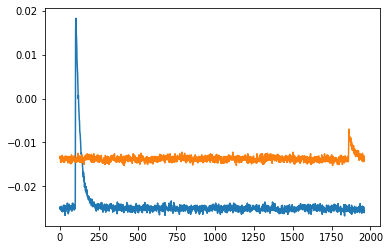

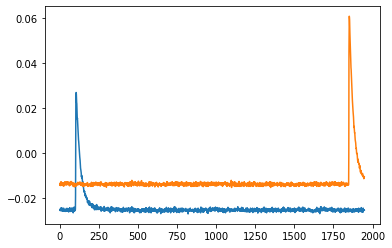

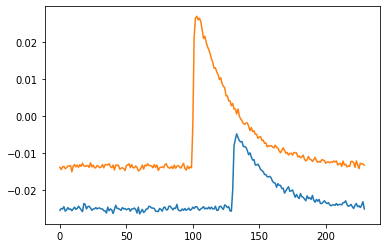

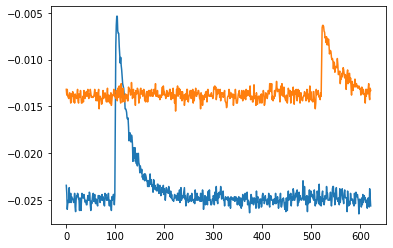

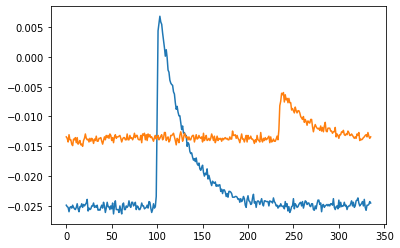

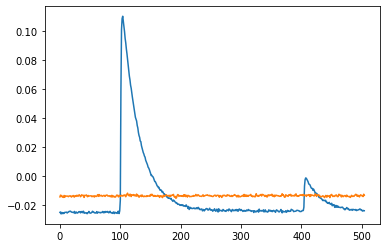

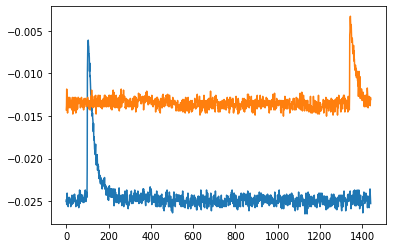

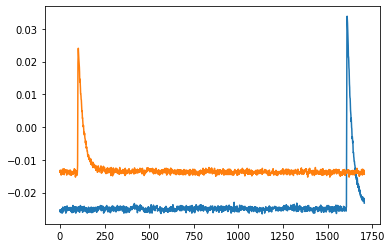

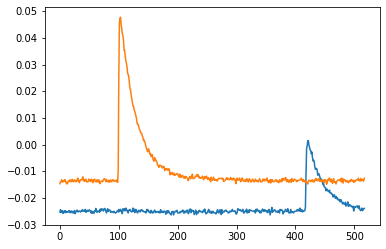

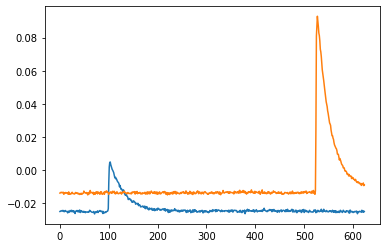

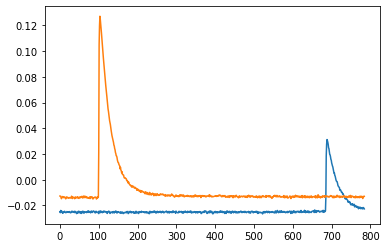

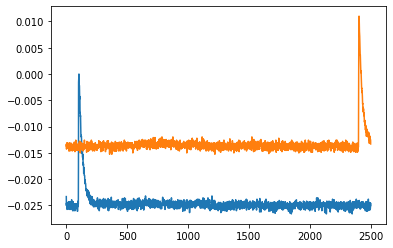

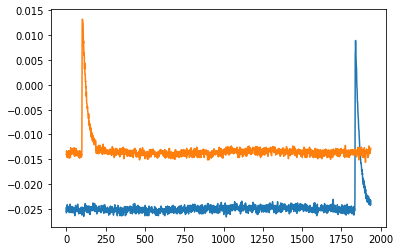

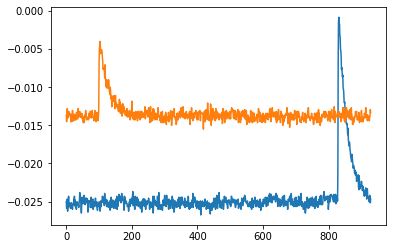

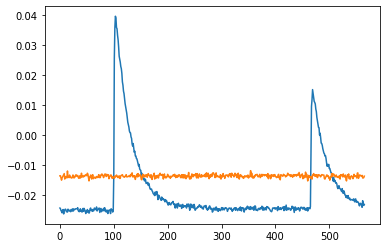

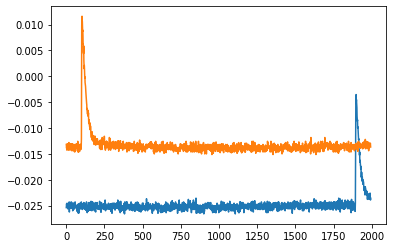

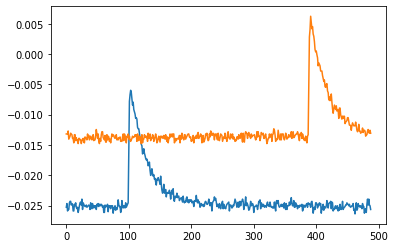

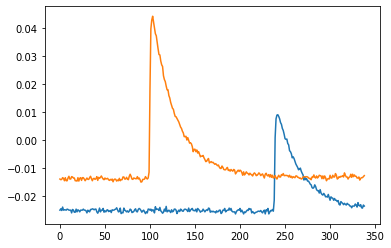

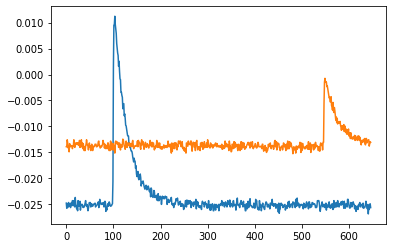

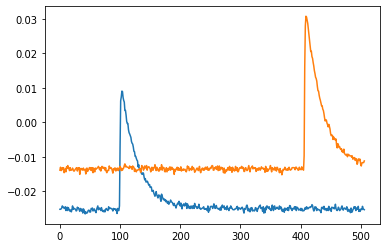

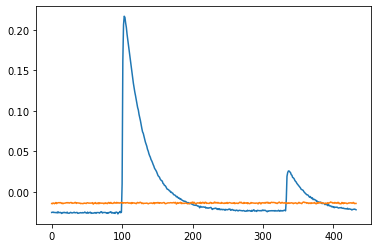

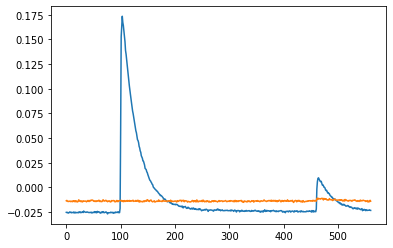

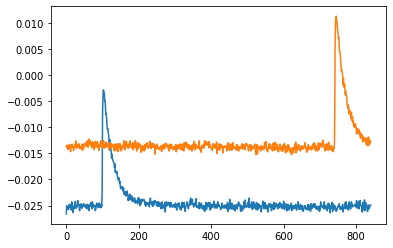

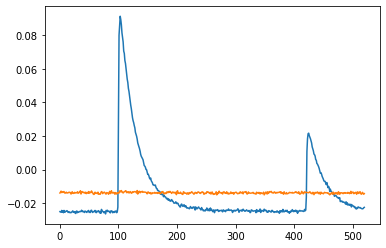

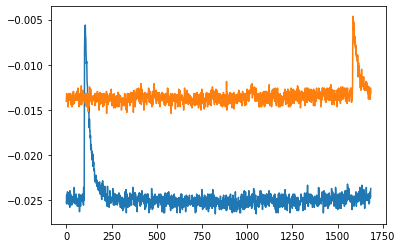

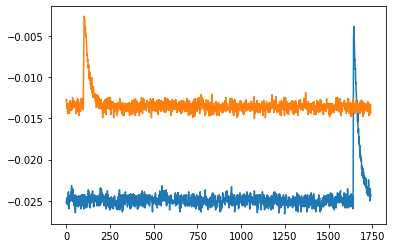

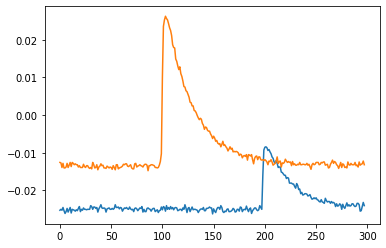

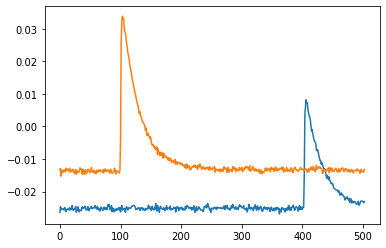

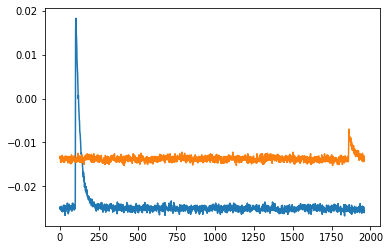

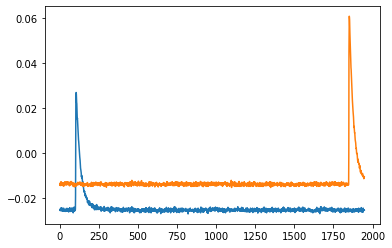

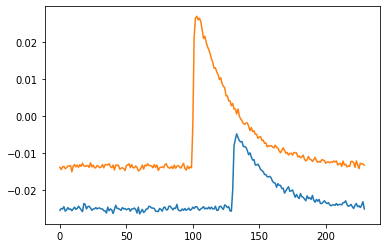

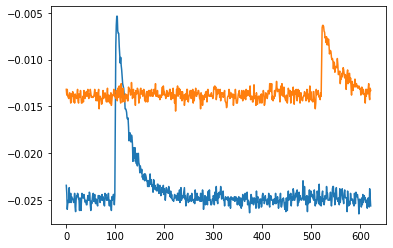

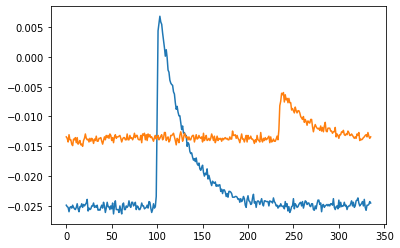

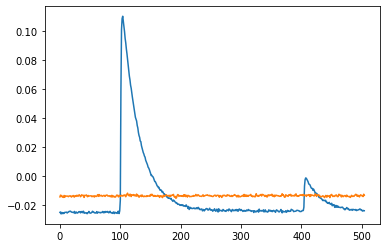

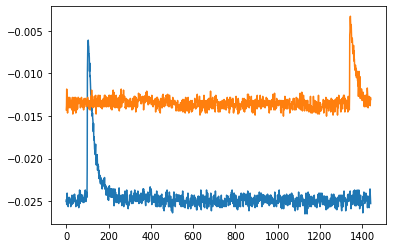

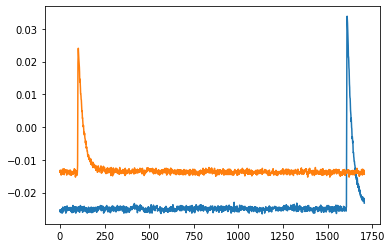

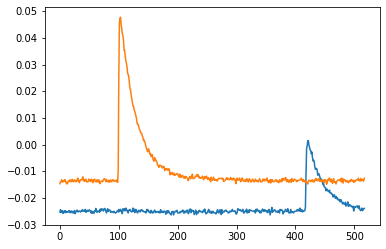

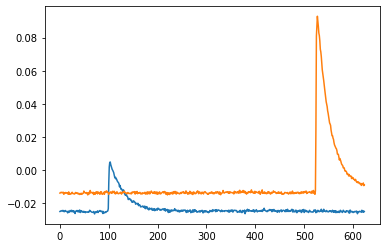

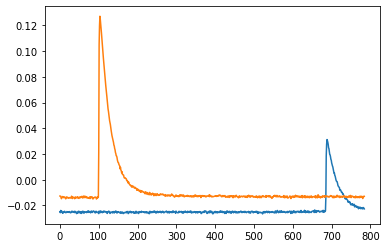

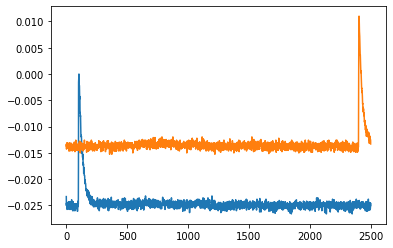

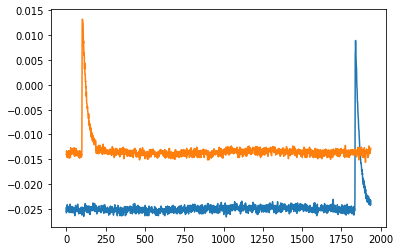

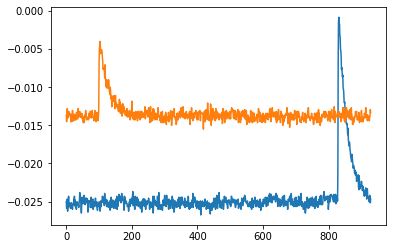

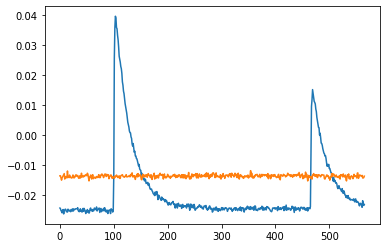

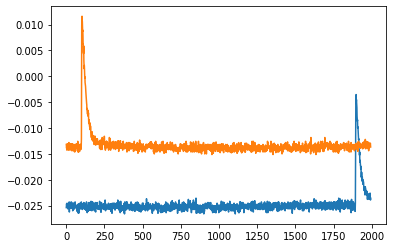

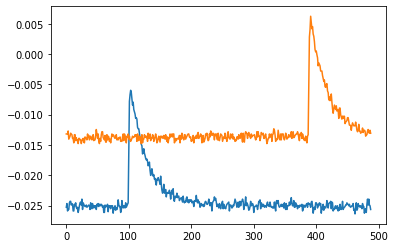

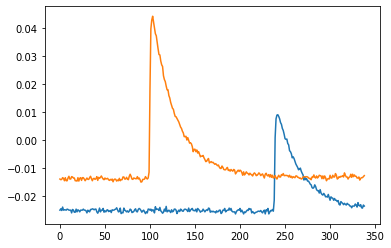

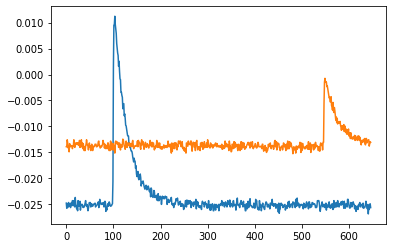

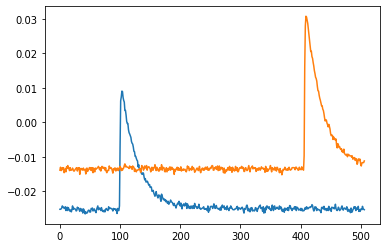

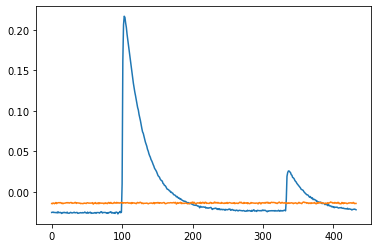

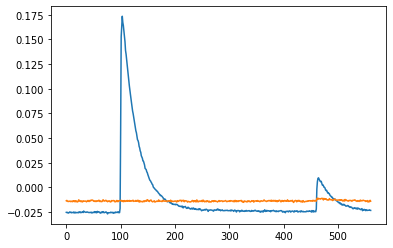

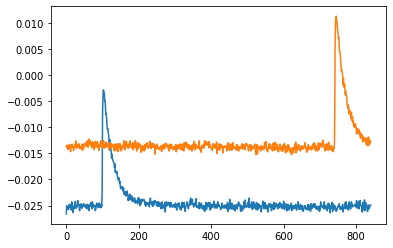

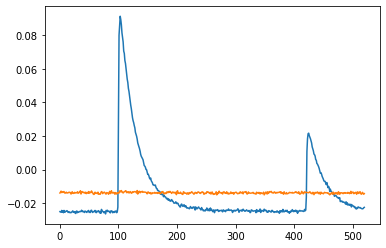

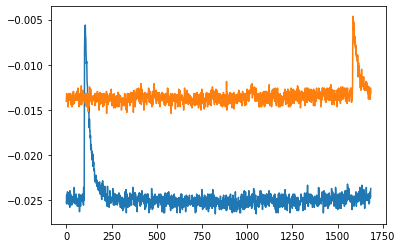

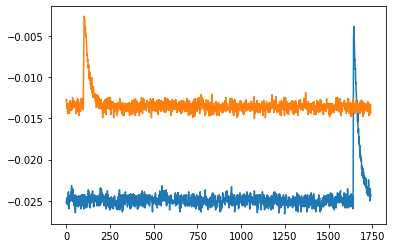

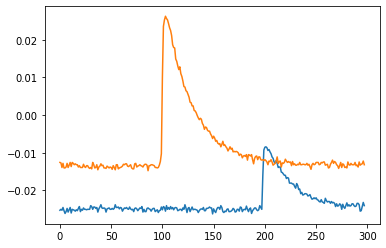

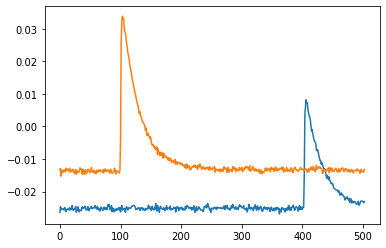

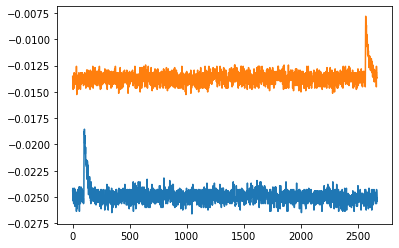

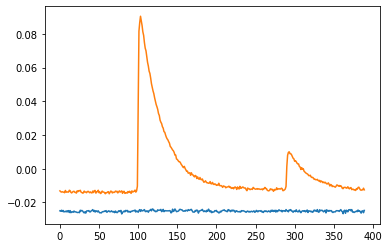

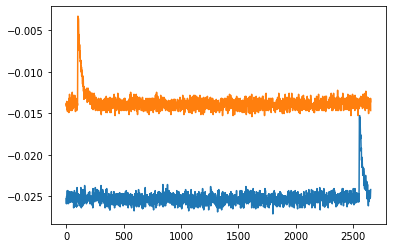

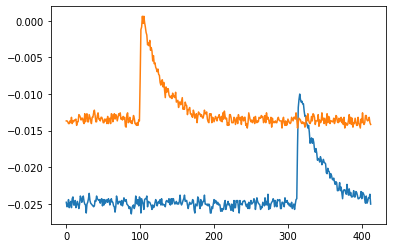

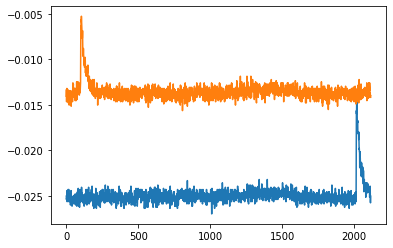

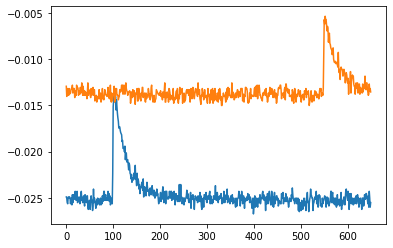

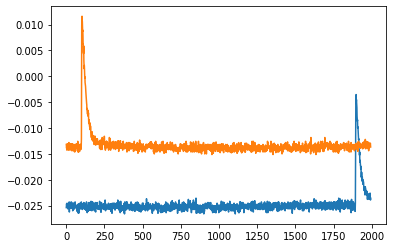

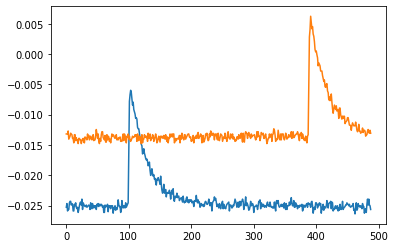

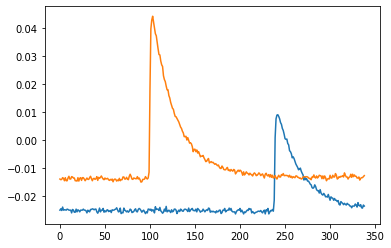

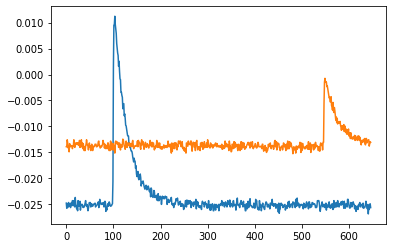

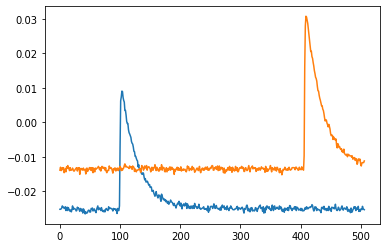

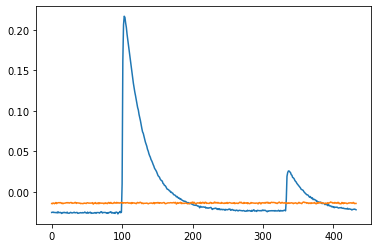

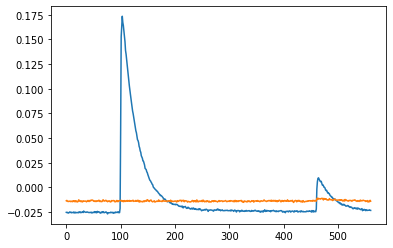

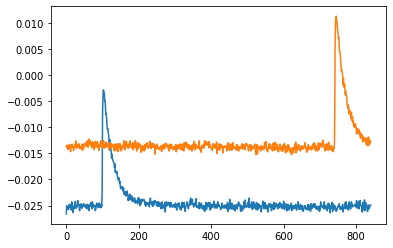

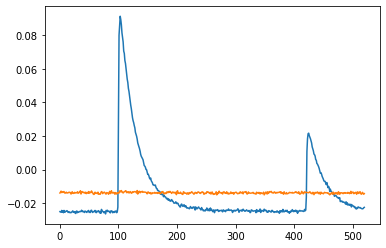

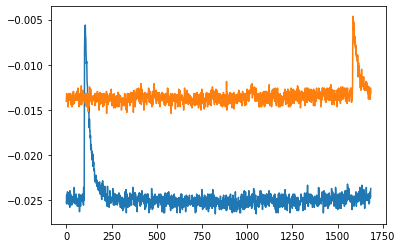

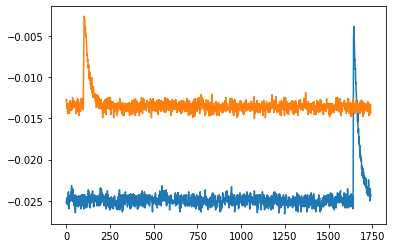

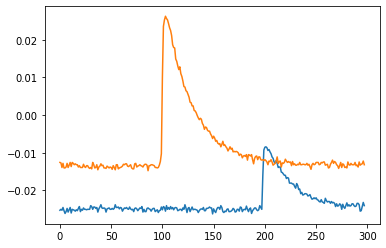

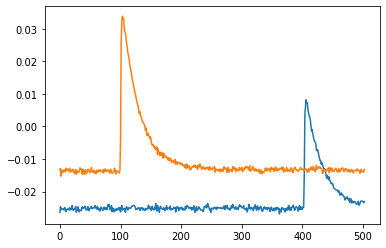

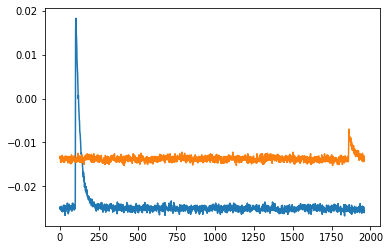

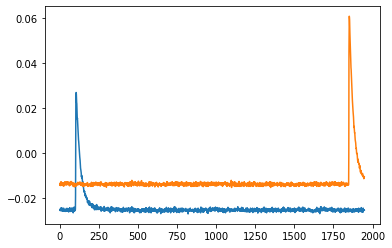

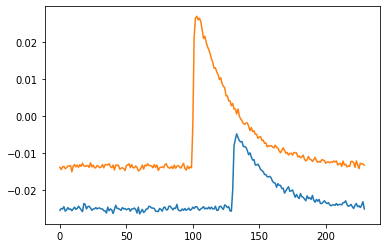

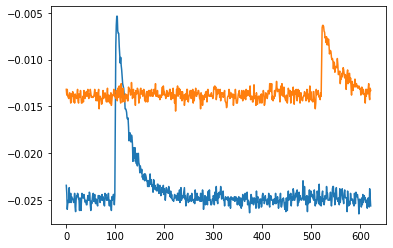

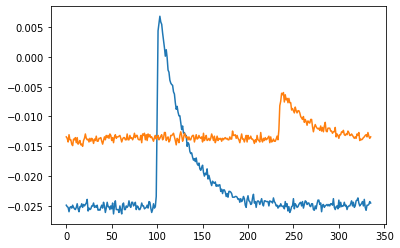

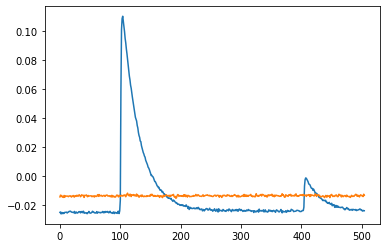

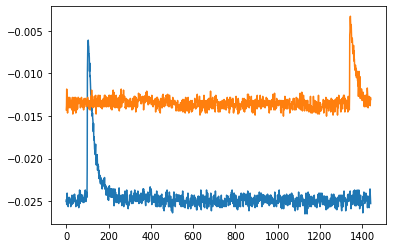

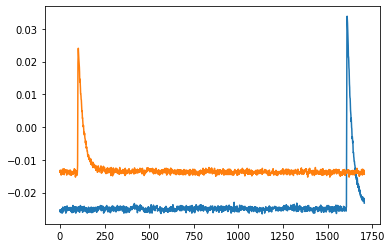

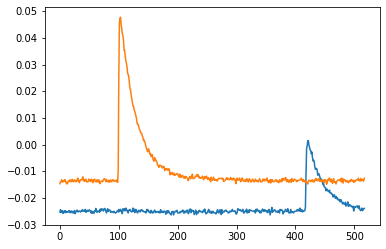

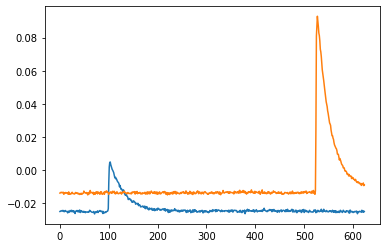

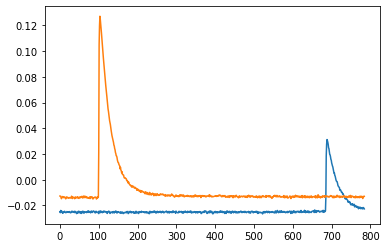

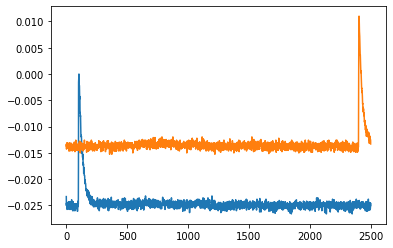

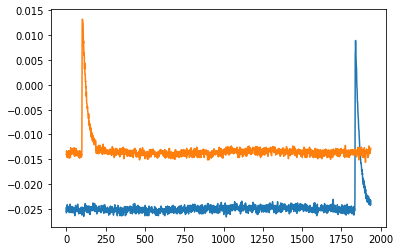

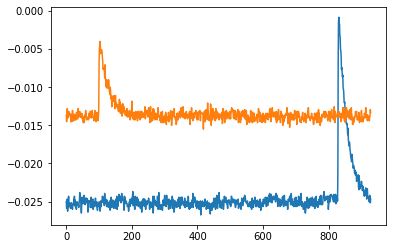

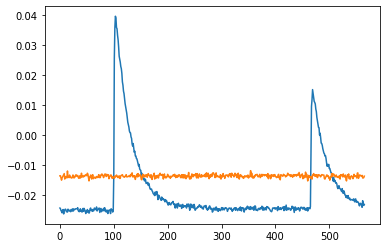

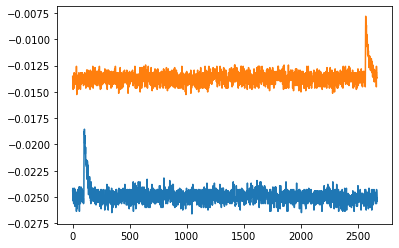

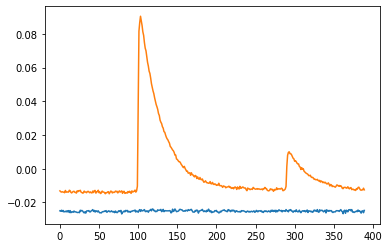

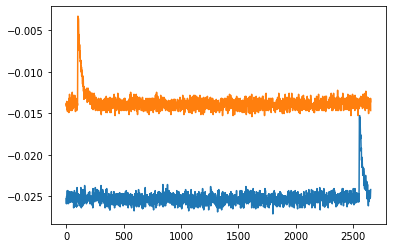

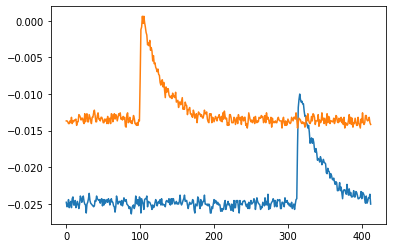

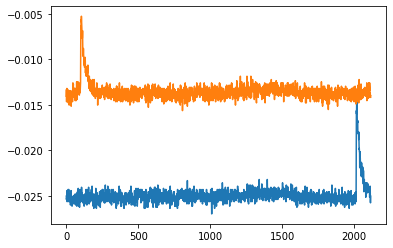

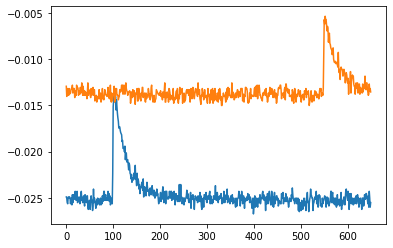

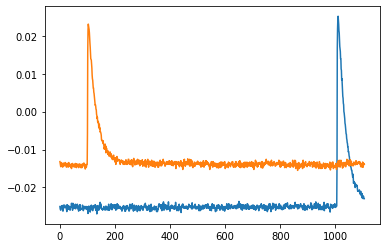

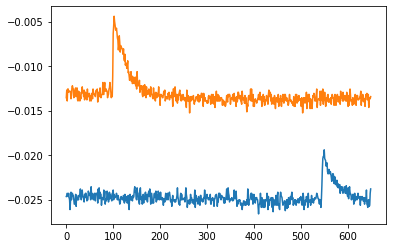

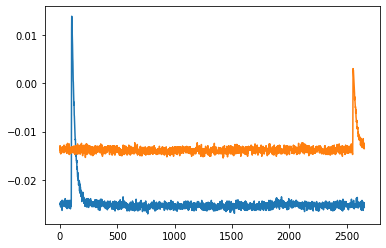

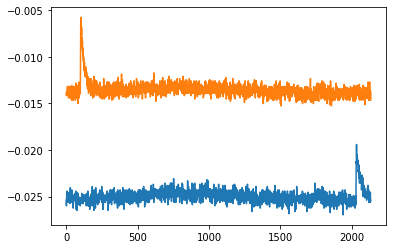

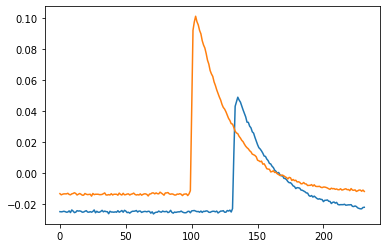

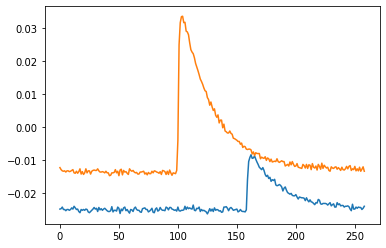

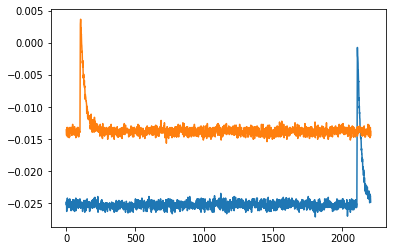

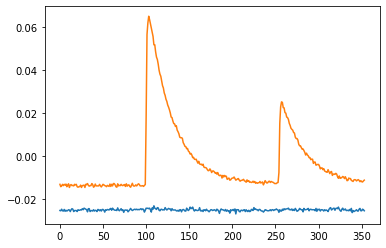

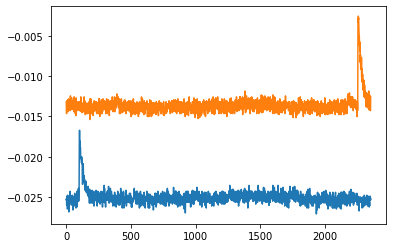

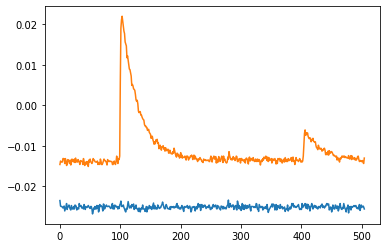

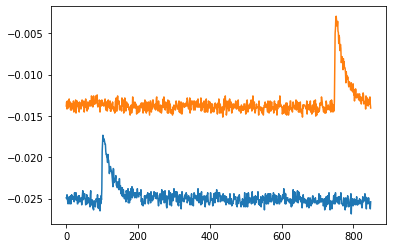

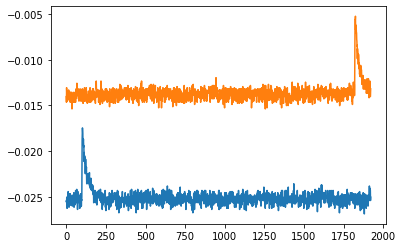

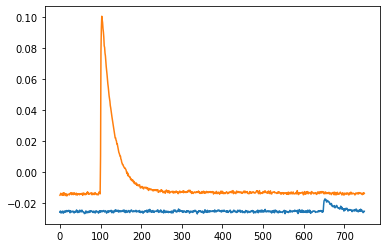

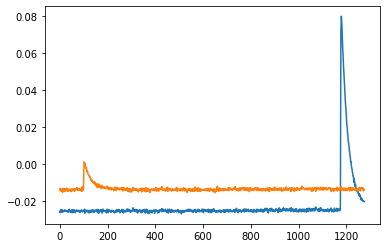

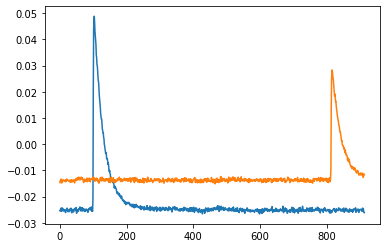

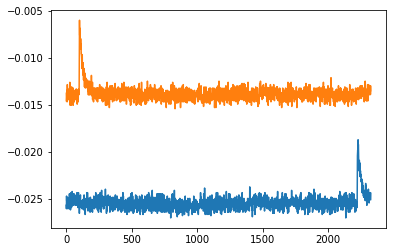

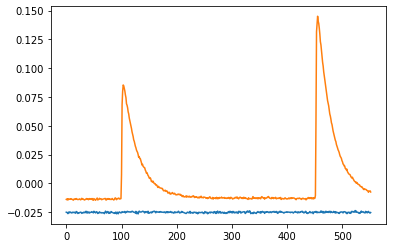

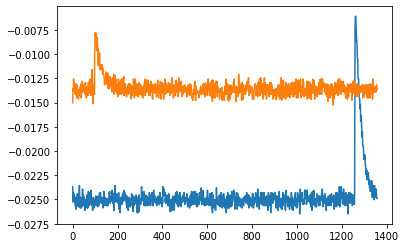

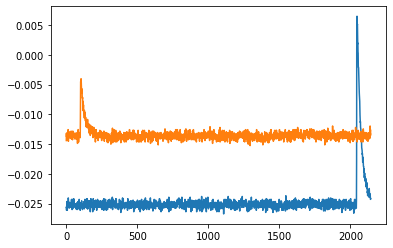

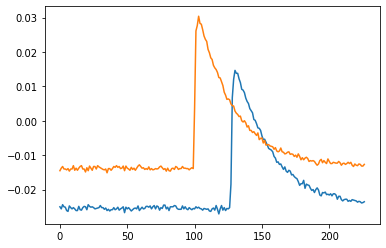

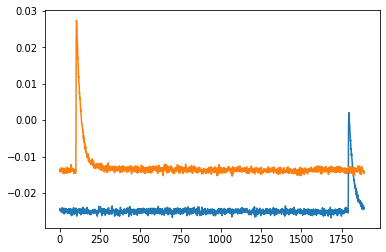

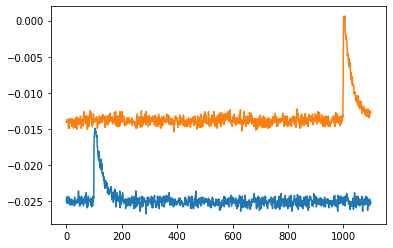

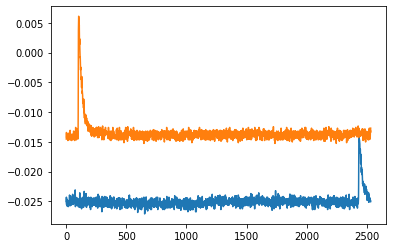

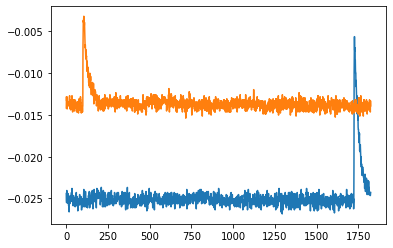

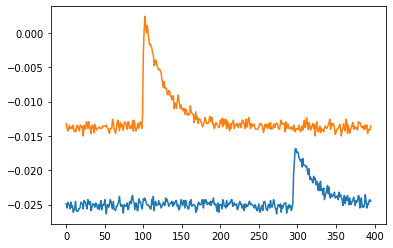

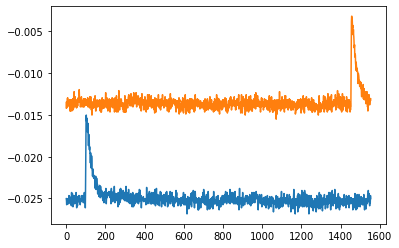

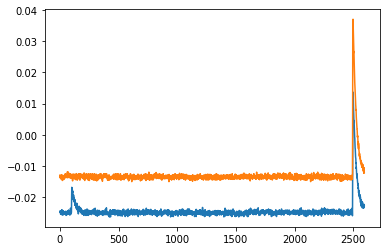

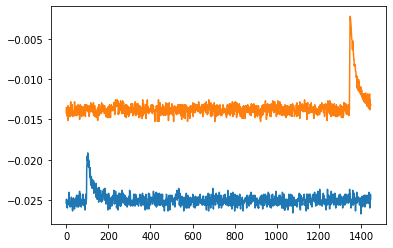

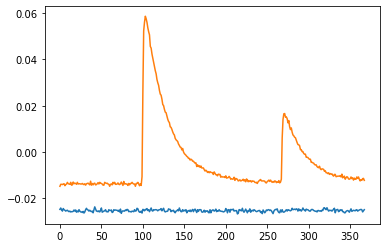

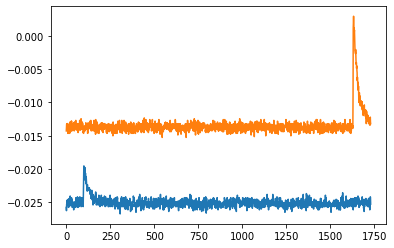

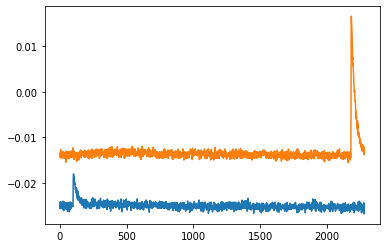

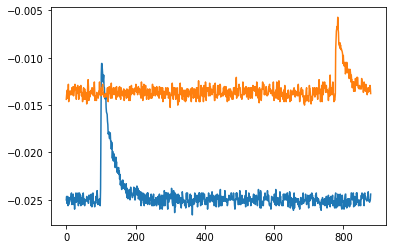

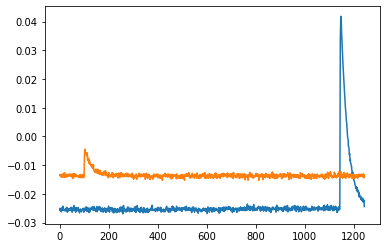

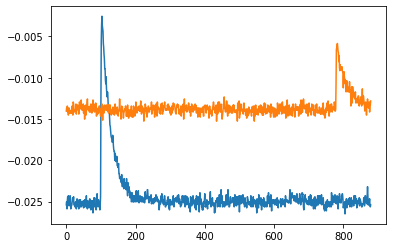

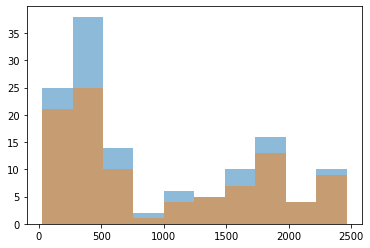

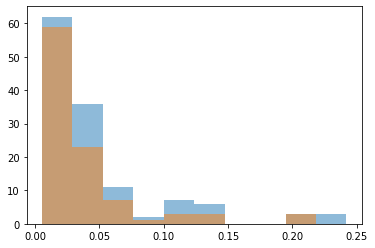

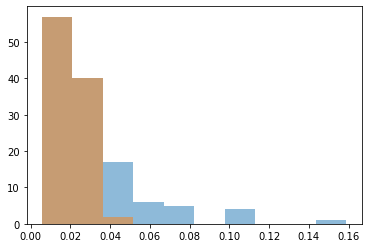

0.047476193940558985
0.029454186495897434


In [46]:
cleanedlife=np.array([])
maxfront=np.array([])
maxback=np.array([])
for i in range(len(y0)):
    if life[i] > 2500:# or life[i] < 150:
        continue
    val0=checkThresh(y0[i],-0.020)
    val1=checkThresh(y1[i],-0.008)
    val0l,max00,max01=doublePulse(y0[i],-0.020)
    val1l,max10,max11=doublePulse(y1[i],-0.008)
    
    if len(val0) > 0 and len(val1) > 0 and abs(val0[0]-val1[0]) > 20:
        xmin = int(min(val0[0],val1[0])-100)
        xmax = int(max(val0[-1],val1[-1])+100)
        max0=np.max(y0[i][int(val0[0]):int(val0[0]+10)])-np.average(y0[i][0:3000])
        max1=np.max(y1[i][int(val1[0]):int(val1[0]+10)])-np.average(y1[i][0:3000])
        omax0=max0
        omax1=max1
        if val0[0] > val1[0]:
            omax0=max1
            omax1=max0
            maxfront = np.append(maxfront,omax0)
            maxback  = np.append(maxback, omax1)
            #print("maxf:",omax0)
            #print("maxb:",omax1)
        else:
            maxfront = np.append(maxfront,omax0)
            maxback  = np.append(maxback, omax1)
            #print("maxf:",omax0)
            #print("maxb:",omax1)
    elif len(val0) == 0 and val1l > 0:
        xmin = int(val1[0]-100)
        xmax = int(val1[-1]+100)
        maxfront = np.append(maxfront,max10)
        maxback  = np.append(maxback, max11)
        #print("dmaxf:",max10)
        #print("dmaxb:",max11)
    elif val0l > 0:
        xmin = int(val0[0]-100)
        xmax = int(val0[-1]+100)
        maxfront = np.append(maxfront,max00)
        maxback  = np.append(maxback, max01)
        #print("dmaxf:",max00)
        #print("dmaxb:",max01)
    else:
        continue
    #if maxback[-1] < 0.04:
    cleanedlife = np.append(cleanedlife,life[i])
    #print("Lifetime",life[i],"maxb:",maxback[-1],"maxf:",maxfront[-1])
    plt.plot(y0[i][xmin:xmax])
    plt.plot(y1[i][xmin:xmax])
    plt.show()
n, bins, patches = plt.hist(cleanedlife,alpha=0.5)
plt.hist(cleanedlife[maxback < 0.04],alpha=0.5,bins=bins)
plt.show()
n, bins, patches = plt.hist(maxfront,alpha=0.5)
plt.hist(maxfront[maxback < 0.04],alpha=0.5,bins=bins)
plt.show()
n, bins, patches = plt.hist(maxback,alpha=0.5)
plt.hist(maxback[maxback < 0.04],alpha=0.5,bins=bins)
plt.show()

#plt.plot(maxback,maxfront)
#plt.show()
print(np.average(maxfront))
print(np.average(maxback))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 8
    # variables        = 3
    chi-square         = 6.26857010
    reduced chi-square = 1.25371402
    Akaike info crit   = 4.04885387
    Bayesian info crit = 4.28717849
[[Variables]]
    a:  74.3594920 +/- 28.3966905 (38.19%) (init = 10)
    b:  1.98503142 +/- 0.76746361 (38.66%) (init = 2.3)
    c:  9.08470778 +/- 1.72880334 (19.03%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.851
    C(b, c) = -0.556
    C(a, c) =  0.322


(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

<Figure size 432x288 with 0 Axes>

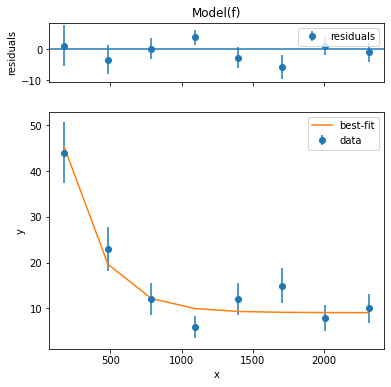

In [107]:
def f(x,a,b,c):
    return a*np.exp(-1*x*0.008/b)+c

import lmfit
points, bin_edges = np.histogram(cleanedlife[np.logical_and(maxback > 0.0,cleanedlife < 2500)],bins=8)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
model  = lmfit.Model(f)
p = model.make_params(a=10,b=2.3,c=2)
err=np.array([])
y=np.array([])
x=np.array([])
i0=-1
for pPoint in points:
    i0=i0+1
    if pPoint > 0:
        x=np.append(x,bin_centers[i0])
        y=np.append(y,pPoint)
        err=np.append(err,1./(pPoint**0.5))
    else:
        x=np.append(x,bin_centers[i0])
        y=np.append(y,pPoint)
        err=np.append(err,1./2.)
#print(points,err)
result = model.fit(data=y, params=p, x=x, weights=err)
lmfit.report_fit(result)
plt.figure()
result.plot()
